# Lecture 06-30

## Topics we still need to cover
 - Pandas
 
For more detail on python please see the Purdue DataMine web link: <a href="https://thedatamine.github.io/the-examples-book/python.html" target="_blank">Data Mine on Python</a>

Also see: <a href="https://docs.python.org/3/" target="_blank">Python 3.9.1 Documentation</a>

In [2]:
# Bring in the packages we have used before.

import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import requests
import pandas as pd

print("Current working directory: {0}".format(os.getcwd()))

Current working directory: /Users/jvk/Documents/Teaching/2021-REEU/06-30-Wed


# Pandas

Built on top of numpy

Efficient implementation of something called a `DataFrame`, which are multi-dimensional arrays that have attached row and column labels and can hold heterogeneous data and missing values.

Particularly good for data wrangling tasks such as grouping and pivot tables.

There are three main Pandas data structures: `Series`, `DataFrame`, and `Index`

For documentation and tutorials see ...

Also see: <a href="https://pandas.pydata.org/docs/" target="_blank">Pandas Documentation</a>

In [3]:
pd.__version__

'0.23.4'

I will want some data to illustrate Pandas concepts. For this I will use the cell phone data set shared earlier. The code below was used before just to wrangled the raw file and save it as a nice csv.

In [5]:
csv_file_name = 'Session_1_20190626_172927.csv'
my_file_name = 'Data/' + csv_file_name
my_new_file_name = 'Data/' + 'Wrangled-' + csv_file_name

fin = open(my_file_name, "r")

line1 = fin.readline() # Header line
line2 = fin.readline() # A data or values line

fields1 = line1.split(';')
fields2 = line2.split(';')

fin.close()

# Create a dictionary and look at it just so one can see the correspondence
# between label and data ... in order to see what to keep

JVKdict = {fields1[i]: fields2[i] for i in range(len(fields1))}

JVKdict

{'\n': '\n',
 'accuracy': '-1',
 'arfcn': '2350',
 'azimuth': 'null',
 'band': '2100',
 'bts_arfcn': 'null',
 'bts_band': 'null',
 'bts_psc_pci': 'null',
 'call_state': 'IDLE',
 'cell_name': 'null',
 'cid': '22',
 'data_act': 'NONE',
 'data_rx': '165826',
 'data_state': 'DISCONNECTED',
 'data_tx': '280305',
 'gps': '0',
 'gsm_neighbors': '0',
 'height': 'null',
 'lac_tac': '58891',
 'lat': '-1.0',
 'long': '-1.0',
 'lte_neighbors': '4',
 'mcc': '311',
 'mnc': '480',
 'net_op_code': '311480',
 'net_op_name': 'Verizon Wireless',
 'net_type': 'LTE',
 'node_id': '230040',
 'psc_pci': '340',
 'report': '0',
 'roaming': '0',
 'rsrq': '-12',
 'rssi': '-86',
 'rssi_strongest': '-90',
 'rssnr': '16',
 'sim_state': 'READY',
 'site_lat': '',
 'site_long': '',
 'site_name': 'null',
 'slev': '4',
 'sys_time': '20190626172928',
 'tech': 'LTE',
 'tilt_el': 'null',
 'tilt_mech': 'null',
 'umts_neighbors': '0'}

Looking at the dictionary above I get some clues as to what columns I want to keep in the wrangled file ...

Some of these I looked up using google:

* arfcn = Absolute radio-frequency channel number 
* cid = Cell identification number
* lac_tac = has something to do with the location code of a base station set


In [6]:
# My version of the columns to keep

ColsToKeep = ['accuracy', 'arfcn', 'band', 'cid', 'gps', 'lat', 'long', 'net_op_name', 'net_type', 'roaming', 'rssi', 'sys_time', 'tech']

In [7]:
cindex = []

for string in ColsToKeep:
    cindex.append(fields1.index(string))

newfields1 = []

for k in range(len(cindex)):
    c = cindex[k]
    s = fields1[c]
    newfields1.append(s)

# This creates the file and, if aleady exists, erases any 
# old content
fout = open(my_new_file_name, "w")
fout.close() 

# The code below creates the header for the new csv file

newline = ','.join(newfields1)

fout = open(my_new_file_name, "a")
print(newline, file=fout)
fout.close() 


In [8]:
# To create the remainder of the new file
fin = open(my_file_name, "r")

fin.readline() # Move past the heading in the input file

fout = open(my_new_file_name, "a")

for line in fin:
    
    fields2 = line.split(';')
    
    newfields2 = []

    for k in range(len(cindex)):
        c = cindex[k]
        s = fields2[c]
        newfields2.append(s)
    
    newline = ','.join(newfields2)

    print(newline, file=fout)

fin.close()
fout.close()

## Pandas DataFrame

In [9]:
CellLog = pd.read_csv(my_new_file_name)

In [10]:
type(CellLog)

pandas.core.frame.DataFrame

In [11]:
CellLog.index

RangeIndex(start=0, stop=51648, step=1)

In [12]:
CellLog.columns

Index(['accuracy', 'arfcn', 'band', 'cid', 'gps', 'lat', 'long', 'net_op_name',
       'net_type', 'roaming', 'rssi', 'sys_time', 'tech'],
      dtype='object')

In [13]:
Time = CellLog['sys_time']

In [14]:
type(Time)

pandas.core.series.Series

In [15]:
Time

0        20190626172928
1        20190626172929
2        20190626172930
3        20190626172931
4        20190626172932
5        20190626172933
6        20190626172934
7        20190626172935
8        20190626172936
9        20190626172937
10       20190626172938
11       20190626172939
12       20190626172940
13       20190626172941
14       20190626172942
15       20190626172943
16       20190626172944
17       20190626172945
18       20190626172946
19       20190626172947
20       20190626172948
21       20190626172949
22       20190626172950
23       20190626172951
24       20190626172952
25       20190626172953
26       20190626172954
27       20190626172955
28       20190626172956
29       20190626172957
              ...      
51618    20190627075118
51619    20190627075119
51620    20190627075120
51621    20190627075121
51622    20190627075122
51623    20190627075123
51624    20190627075124
51625    20190627075126
51626    20190627075127
51627    20190627075128
51628    2019062

In [16]:
print(CellLog)

       accuracy  arfcn  band  cid  gps        lat       long  \
0            -1   2350  2100   22    0  -1.000000  -1.000000   
1            -1   2350  2100   22    0  -1.000000  -1.000000   
2            -1   2350  2100   22    0  -1.000000  -1.000000   
3            -1   2350  2100   22    0  -1.000000  -1.000000   
4            -1   2350  2100   22    0  -1.000000  -1.000000   
5            -1   2350  2100   22    0  -1.000000  -1.000000   
6            -1   2350  2100   22    0  -1.000000  -1.000000   
7            -1   2350  2100   22    0  -1.000000  -1.000000   
8            -1   2350  2100   22    0  -1.000000  -1.000000   
9            -1   2350  2100   22    0  -1.000000  -1.000000   
10           -1   2350  2100   22    0  -1.000000  -1.000000   
11           -1   2350  2100   22    0  -1.000000  -1.000000   
12           -1   2350  2100   22    0  -1.000000  -1.000000   
13           -1   2350  2100   22    0  -1.000000  -1.000000   
14           -1   2350  2100   22    0  

In [17]:
CellLog

,accuracy,arfcn,band,cid,gps,lat,long,net_op_name,net_type,roaming,rssi,sys_time,tech
0,-1,2350,2100,22,0,-1.000000,-1.000000,Verizon Wireless,LTE,0,-86,20190626172928,LTE
1,-1,2350,2100,22,0,-1.000000,-1.000000,Verizon Wireless,LTE,0,-85,20190626172929,LTE
2,-1,2350,2100,22,0,-1.000000,-1.000000,Verizon Wireless,LTE,0,-85,20190626172930,LTE
3,-1,2350,2100,22,0,-1.000000,-1.000000,Verizon Wireless,LTE,0,-85,20190626172931,LTE
4,-1,2350,2100,22,0,-1.000000,-1.000000,Verizon Wireless,LTE,0,-85,20190626172932,LTE
5,-1,2350,2100,22,0,-1.000000,-1.000000,Verizon Wireless,LTE,0,-85,20190626172933,LTE
6,-1,2350,2100,22,0,-1.000000,-1.000000,Verizon Wireless,LTE,0,-85,20190626172934,LTE
7,-1,2350,2100,22,0,-1.000000,-1.000000,Verizon Wireless,LTE,0,-86,20190626172935,LTE
8,-1,2350,2100,22,0,-1.000000,-1.000000,Verizon Wireless,LTE,0,-86,20190626172936,LTE
9,-1,2350,2100,22,0,-1.000000,-1.000000,Verizon Wireless,LTE,0,-86,20190626172937,LTE


## Pandas Series

In [18]:
CellLog['tech'].unique()

array(['LTE', 'UNKNOWN'], dtype=object)

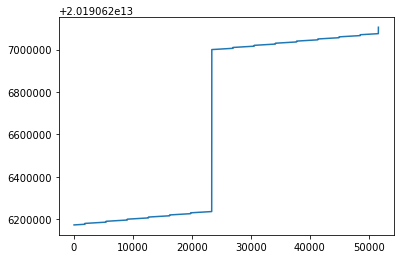

In [22]:
plt.plot(Time)

In [19]:
CellLog['gps'].unique()

array([0, 1])

In [20]:
CellLog['accuracy'].unique()

array([ -1,  73,  72,  75,  71,  61,  54,  52,  48,  51,  53,  57,  63,
        66,  68,  79,  92, 103, 113, 110, 100,  95,  97,  99,  96, 108,
       122, 134, 145, 155, 166, 173, 184, 194, 200, 209, 215, 218, 226,
       229, 235, 241, 246, 251, 255, 258, 262, 210, 169, 141, 123, 118,
       111,  94,  90,  93,  98,  91,  86,  85,  81,  84,  77,  69,  80,
        82,  76,  64,  65,  67, 107, 146, 136, 114, 112,  87,  83, 126,
       140, 130, 129, 125, 128, 139, 147, 157, 138, 132, 120, 116, 102,
        70,  78,  88, 115, 137, 143, 149, 160, 171, 176, 180, 183, 186,
       189, 191, 196, 198, 199, 201, 203, 202, 192, 188, 187, 185, 151,
        62,  47,  46,  45,  42,  35,  39,  40,  36,  38,  41,  43,  56,
        60,  55, 105, 109,  58, 101, 142, 179, 197, 217, 227, 232, 239,
       256, 264, 222, 162, 124, 131, 144, 167, 135, 153, 164, 174, 152,
       154, 181, 234, 249, 263, 261, 252, 260, 161, 150,  49,  34,  33,
        32,  28,  27,  24,  25,  31,  37,  50, 106, 117, 121, 20

In [21]:
CellLog['band'].unique()

array([2100,   -1,  700,  850, 1900])

In [23]:
Power = CellLog['rssi']

In [24]:
type(Power)

pandas.core.series.Series

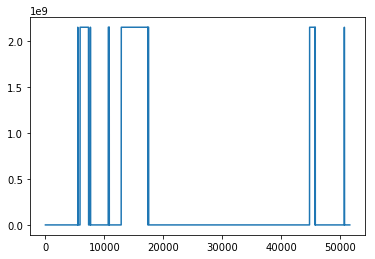

In [25]:
plt.plot(Power)

In [26]:
Power.unique()

array([       -86,        -85,        -87,        -84,        -82,
              -88,        -89,        -90,        -91,        -92,
              -83,        -80,        -74,        -73,        -81,
              -76,        -77,        -75,        -79,        -78,
              -70,        -71,        -72,        -93,        -94,
              -96,        -98,        -97,        -95,        -99,
             -100,       -104,       -105,       -103,       -101,
             -108,       -102,       -111,       -112,       -113,
             -110,       -107,       -106,        -69,        -63,
              -66,        -67,        -65,        -68,       -115,
             -118,       -119,       -117,       -116,       -114,
             -120,       -121,       -127,       -109, 2147483647,
             -122,       -128,       -123,       -124,       -126,
             -125,       -130,       -131,       -135,       -132,
             -129,        -64])

In [27]:
New = CellLog['rssi'] < 1

In [28]:
type(New)

pandas.core.series.Series

In [29]:
New

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
         ... 
51618    True
51619    True
51620    True
51621    True
51622    True
51623    True
51624    True
51625    True
51626    True
51627    True
51628    True
51629    True
51630    True
51631    True
51632    True
51633    True
51634    True
51635    True
51636    True
51637    True
51638    True
51639    True
51640    True
51641    True
51642    True
51643    True
51644    True
51645    True
51646    True
51647    True
Name: rssi, Length: 51648, dtype: bool

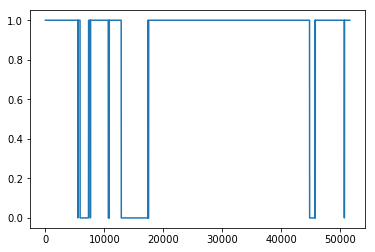

In [30]:
plt.plot(New)

In [31]:
NewRssi = CellLog['rssi'].loc[New]

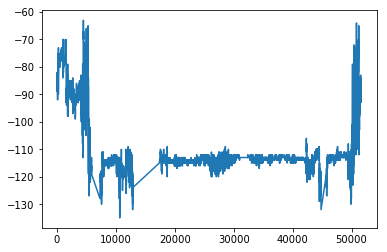

In [32]:
plt.plot(NewRssi)